<a href="https://colab.research.google.com/github/matheusfsm/Data-Science-Projects/blob/master/Analisando_dados_Airbnb_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Análise dos Dados do Airbnb - *Rio de Janeiro*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados aqui são públicos e foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), os dados já foram limpos e agregados, com o objetivo de facilitar os estudos.
 

* ` listings.csv ` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*




In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv')



## Análise dos Dados
 
 Descrição dos dados para a construção de um conhecimento prévio com o objetivo de trazer transparência e tornar a análise menos abstrata.

**Dicionário das variáveis**

* `id` - Número de identificação do imóvel.
* `name` - Nome do estabelecimento, propriedade.
* `host_id` - Número de identificação do anfitrião.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - 'sem valores válidos'.
* `neighbourhood` - Nome do bairro.
* `latitude` - Coordenada de latitude da propriedade.
* `longitude` - Coordenada de longitude da propriedade.
* `room_type` - Tipo de quarto oferecido/ ou imóvel inteiro.
* `price` - Preço do aluguel.
* `minimum_nights` - Quantidade minima de noites para a reserva.
* `number_of_reviews` - Total de comentários sobre o imóvel.
* `last_review` - Data do último comentário.
* `reviews_per_month` - Número de comentários por mês.
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião.
* `availability_365` - Número de dias disponíveis dentro de 365 dias.
											


In [ ]:
# mostrando as 10 primeiras entradas
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358
5,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,132,3,332,2020-03-13,2.85,1,128
6,48305,"Beach Block 6bed Penthouse, Ipanema Best Locat...",70933,Alex,NaN,Ipanema,-22.98599,-43.20299,Entire home/apt,4036,2,74,2020-03-08,0.66,5,322
7,48726,Rio de Janeiro Copacabana Ipanema,221941,Vana,NaN,Copacabana,-22.98359,-43.19382,Private room,100,3,42,2019-08-08,1.40,1,71
8,48901,Confortable 4BD 3.5BT Atlantic avenue,222884,Marcio,NaN,Copacabana,-22.96574,-43.17514,Entire home/apt,548,4,4,2020-03-08,0.07,1,356
9,49179,Djalma Ocean View - #100A,224192,David,NaN,Copacabana,-22.97910,-43.19008,Entire home/apt,239,3,83,2020-02-17,0.92,41,245


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificando o volume de dados do DataFrame

print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))

# verificando os tipos de entradas do Dataset
display(df.dtypes)

Entradas:	 35870
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# obtendo o percentual de valores ausentes
# ordenando em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

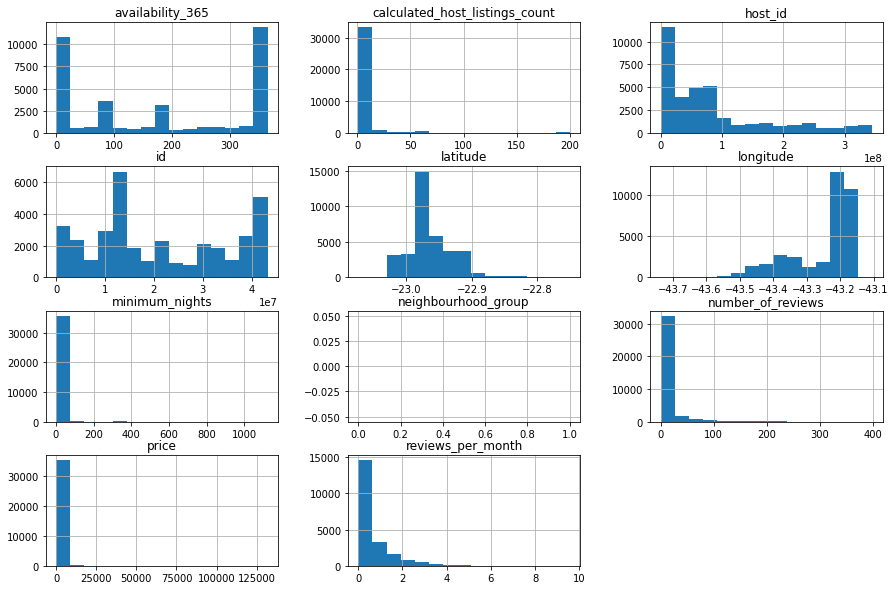

In [ ]:
# plotando os histogramas das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers* (valores atípicos). Olhe por exemplo `price, minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras que auxiliam a detecção de *outliers*:
 * Resumo estatístico por meio do método `describe()`.
 * Plotar `boxplots` para a variável.

In [ ]:
# ver a média da coluna `price``

df['price'].describe()

count     35870.000000
mean        753.686367
std        2229.366334
min           0.000000
25%         158.000000
50%         298.000000
75%         632.000000
max      131727.000000
Name: price, dtype: float64

In [ ]:
# ver o resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


### Histogramas sem *ouliers*
 * Já que identificamos ouliers nas variáveis ```price``` e ```minimum_nights```, vamos agora limpar o dataframe delas e plotar novamente o histograma.


In [ ]:
# remoção de ouliers em um novo dataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

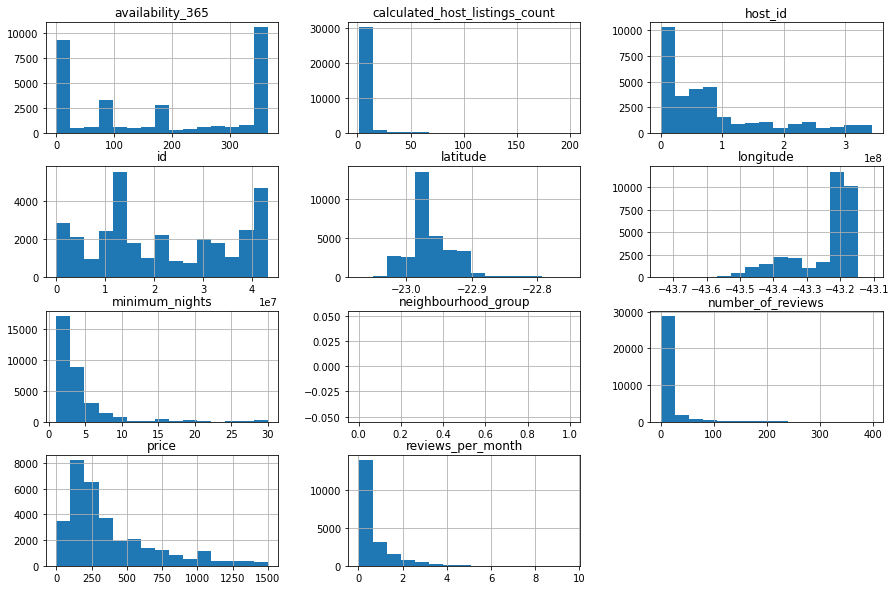

In [ ]:
# plotando os histogramas das variáveis numéricas sem outliers

df_clean.hist(bins=15, figsize=(15,10));

### Boxplot para minimum_nights


minimum_nights: valores acima de 30:
224 entradas
0.6245%


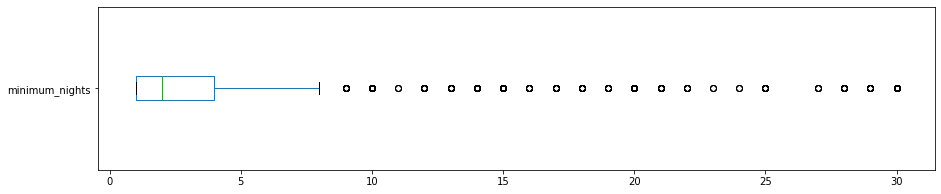

In [ ]:
# minimun_nights

df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))

#vendo quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30:')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

373.56805521168604

### Boxplot para price



price: diárias acima de 1500 reais:
3360 entradas
99.9805%


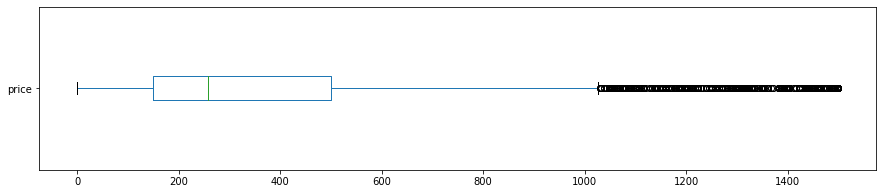

In [ ]:
# price

df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))

#vendo preços de diárias acima de 1500 reais
print('\nprice: diárias acima de 1500 reais:')
print('{} entradas'.format(len(df[df.price > 1500])))
print('{:.4f}%'.format((len(df[df.price > 30]) / df.shape[0])*100))

### **Q5. Qual a correlação existente entre as variáveis?**
 * Buscar variáveis no data set que tem fortes afinidades e correlações

In [ ]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.163318,-0.162241,-0.162366,0.047043,-0.015328
minimum_nights,0.163318,1.000000,-0.059857,-0.080109,-0.033148,-0.016418
number_of_reviews,-0.162241,-0.059857,1.000000,0.645518,-0.026347,0.050653
reviews_per_month,-0.162366,-0.080109,0.645518,1.000000,-0.013855,-0.020716
calculated_host_listings_count,0.047043,-0.033148,-0.026347,-0.013855,1.000000,0.073733
availability_365,-0.015328,-0.016418,0.050653,-0.020716,0.073733,1.000000


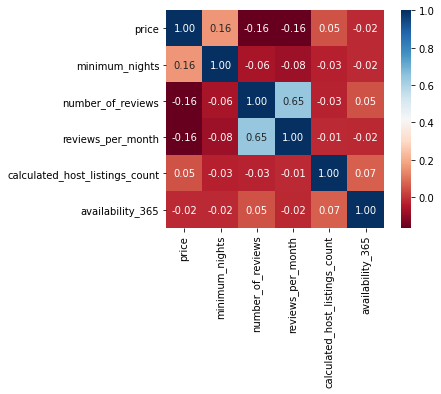

In [ ]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap= 'RdBu', fmt= '.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    22418
Private room        8969
Shared room          765
Hotel room           160
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.693798
Private room       0.277575
Shared room        0.023675
Hotel room         0.004952
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**
 * Uma maneira de verificar uma variável em função da outra é usando o ```groupby()```. 
No caso, queremos comparar os bairros (neighbourhoods) a partir do preço da locação.




In [ ]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]

neighbourhood
Vaz Lobo                    875.666667
Engenheiro Leal             800.000000
Ricardo de Albuquerque      601.200000
Paciência                   523.555556
Lagoa                       522.097859
Abolição                    483.666667
Leblon                      479.767359
Anchieta                    475.600000
Deodoro                     474.000000
Joá                         472.382979
Engenho de Dentro           470.861111
Barra da Tijuca             470.478194
Inhoaíba                    466.000000
Jacarepaguá                 465.080763
Maracanã                    461.579767
Ipanema                     456.418545
São Conrado                 455.468927
Recreio dos Bandeirantes    454.955782
Vargem Grande               449.336449
Pedra de Guaratiba          441.133333
Name: price, dtype: float64

In [ ]:
# Resumo estatístico de disponibilidade anual.

df_clean['availability_365'].describe()

count    32312.000000
mean       181.343371
std        151.343222
min          0.000000
25%          0.000000
50%        178.000000
75%        362.000000
max        365.000000
Name: availability_365, dtype: float64

In [ ]:
df_clean['price'].describe()

count    32312.000000
mean       373.568055
std        311.269733
min          0.000000
25%        149.000000
50%        258.000000
75%        501.000000
max       1499.000000
Name: price, dtype: float64

Acima, vemos que bairros como Vaz Lobo, Engenheiro Leal, Ricardo de Albuquerque e Paciência, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

 Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Vaz Lobo.

In [ ]:
# ver a quantidade de imóveis no Vaz Lobo

print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

df_clean[df_clean.neighbourhood == "Vaz Lobo"]


(3, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2908,2768499,Próximo ao Maracanã,14157867,Fernando,NaN,Vaz Lobo,-22.85955,-43.32918,Private room,1000,1,0,NaN,NaN,1,0
15776,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,NaN,Vaz Lobo,-22.85583,-43.32441,Entire home/apt,1329,15,0,NaN,NaN,1,365
33803,42012781,Casas flegler,332881900,Igor Flegler De Souza,NaN,Vaz Lobo,-22.86070,-43.32446,Private room,298,1,0,NaN,NaN,1,362


In [ ]:
# ver a quantidade de imóveis no Engenheiro Leal
print(df_clean[df_clean.neighbourhood == "Engenheiro Leal"].shape)

df_clean[df_clean.neighbourhood == "Engenheiro Leal"]

(2, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22589,26996243,Engenheiro Leal Casa,159787826,Antonio,NaN,Engenheiro Leal,-22.87497,-43.32121,Entire home/apt,1499,15,0,NaN,NaN,2,365
34840,42403931,Quarto em Cascadura,336310280,Rodrigo,NaN,Engenheiro Leal,-22.87728,-43.32327,Private room,101,1,0,NaN,NaN,1,90


 * Notamos aqui, que pelo fato de ter somente 3 entradas, o valor da média acaba ficando distorcido da realidade, tendo em vista que o *dataset* possui mais de 30mil entradas.

 Vale estar atento a esses fatos, pois podem passar uma mensagem de forma errônea.

Através das coordenadas geográficas do *dataset* é possível mapear todos os pontos analisados.

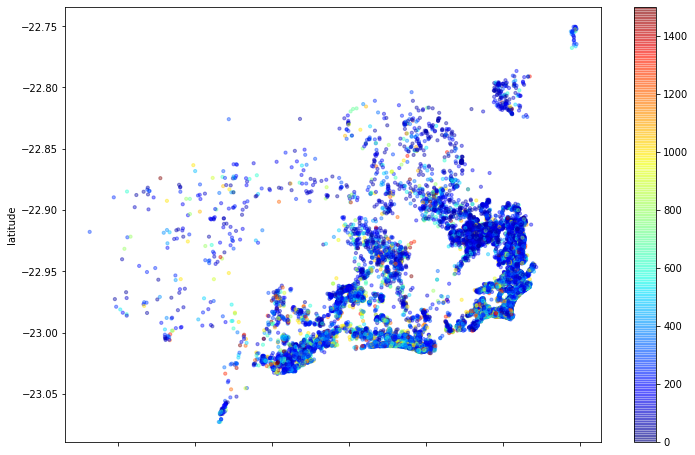

In [ ]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=10,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

df_clean['minimum_nights'].mean()

3.4390009903441445

### **Q9. Qual a taxa de vacância anual?**

In [ ]:
df.availability_365.value_counts()

0      9818
365    5561
364    2179
363    1250
89     1037
       ... 
206       7
114       6
205       6
216       5
195       4
Name: availability_365, Length: 366, dtype: int64

## Conclusões


Após uma análise superficial na base de dados do Airbnb, percebemos a existência de **outliers** em algumas variáveis, valores que acabam distorcendo as informações estatísticas, como por exemplo valores médios de diárias.

Uma obervação importante é que mais de 60% das acomodações, correspondem a locação de todo o espaço do imóvel.

Vale ressaltar que este é um *dataset* resumido, ideal para uma abordagem inicial. Recomenda para próximas análises exploratórias, o conjunto de dados completos, com 106 atributos disponíveis.